In [1]:
import ipywidgets as widgets

In [2]:
import numpy as np

In [3]:
def squareit(n):
    return n*n

In [4]:
squareit(10)

100

In [5]:
widgets.interact(squareit, n=(0,100))

interactive(children=(IntSlider(value=50, description='n'), Output()), _dom_classes=('widget-interact',))

<function __main__.squareit(n)>

In [6]:
from IPython.display import Image

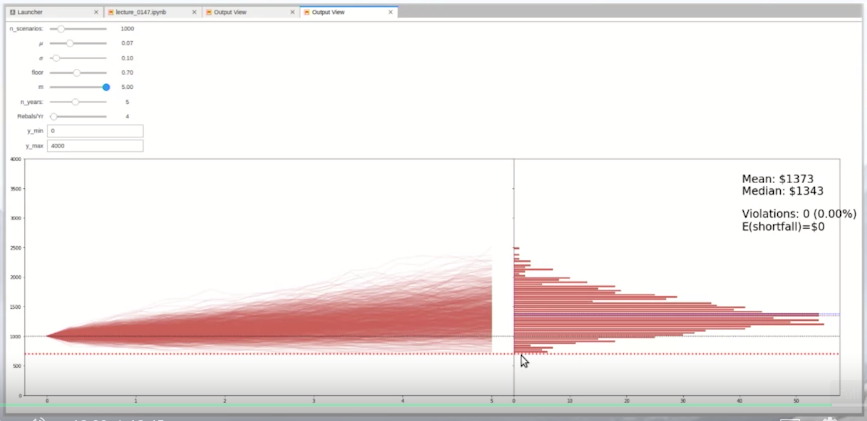

In [7]:
Image('pics/Captura de tela de 2022-10-06 12-54-18.png')

A figura acima mostra: quando o mercado não está muito agitado (vol=10%) vale a pena aumentar o m. M é o quanto do cushion será alocado em ativo de risco. 

In [8]:
from IPython.display import display
import pandas as pd
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

## GBM Interactive Plots

In [9]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of a stock price evolution under a Geometric
    Brownian Montion model
    """
    
    s_0 = 100
    prices = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color='indianred', alpha=0.5,
                     linewidth=2, figsize=(12,5))
    ax.axhline(y=s_0, color='black', ls=':')
    ax.set_ylim(top=400)
    ax.plot(0, s_0, marker='o', color='darkred', alpha=0.2)

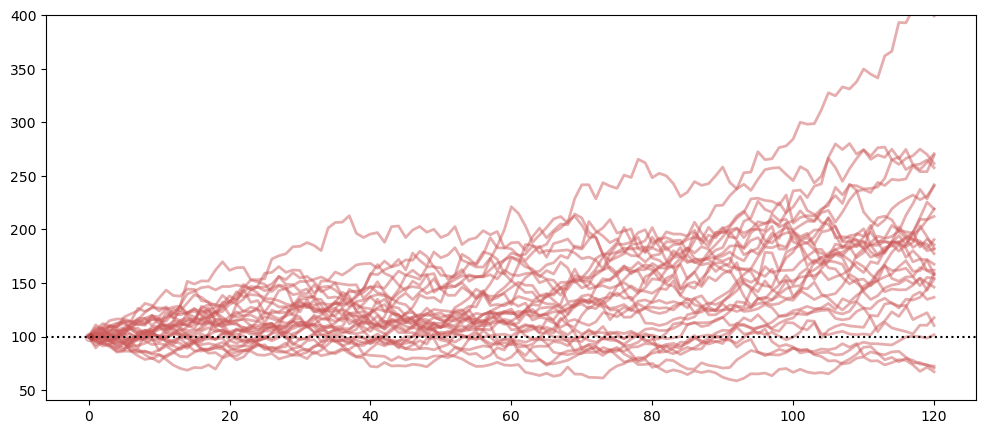

In [10]:
show_gbm(30, 0.07, 0.15)

In [11]:
gbm_controls = widgets.interactive(show_gbm,
                                   n_scenarios=(1,20,1), # (min,max,step)
                                   mu = (-.2, 0.2, 0.01),
                                   sigma = (0,.3,.01)
                                  )

In [12]:
display(gbm_controls)

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.0, de…

## Interactive CPPI Simulation - Monte Carlo

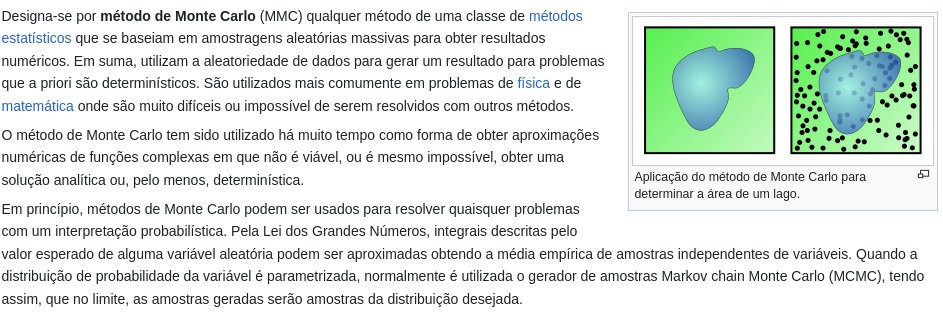

In [13]:
Image('pics/Captura de tela de 2022-10-08 21-34-32.png')

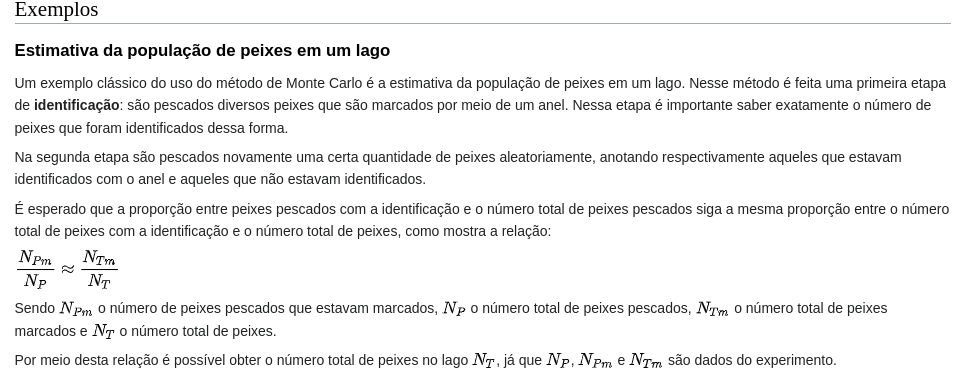

In [14]:
Image('pics/Captura de tela de 2022-10-08 21-38-36.png')

In [15]:
def ao_quadrado(x):
    print(x**2)

controle = widgets.interactive(ao_quadrado, x=(0,100,1))

In [16]:
display(controle)

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

In [17]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3,
             floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu,
                      sigma=sigma, prices=False,
                      steps_per_year=12) # simulated returns
    risky_r = pd.DataFrame(sim_rets) # cada cenário testado é
                                     # um risky asset
    btr = erk.run_cppi(risky_r=risky_r, riskfree_rate=riskfree_rate,
                  m=m, start=start,floor=floor) # back test results
    wealth = btr['Wealth']
    y_max=wealth.values.max()*y_max/100 # y_max vai mostrar
                                        # uma porcentagem do valor 
                                        # maximo encontrado em wealth
    ax = wealth.plot(legend=False, alpha=0.3, color='indianred',
                    figsize=(12,6)) # alpha deixa linha mais tranparente
    ax.axhline(y=start, ls=':', color='black')
    ax.axhline(y=start*floor, ls='--', color='red')
    ax.set_ylim(top=y_max)
    
cppi_controls = widgets.interactive(show_cppi,
                                   n_scenarios=widgets.IntSlider(
                                   min=1, max=1000, step=5, value =50), # value seta um defaut value
                                   mu=(0., .2, .01),
                                   sigma=(0,.30, .05),
                                   floor=(0, 2, .1),
                                   m=(1,5,.5),
                                   riskfree_rate=(0, .05,0.01),
                                   y_max=widgets.IntSlider(
                                   min=0, max=100, step=1, value=100,
                                   description='Zoom Y Axis') 
                                   )

display(cppi_controls)
                                    

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

Para gerar esse gráfico houve um problema. O valor de wealth estava crescendo muito rapidamente, chengado em números absurdos como 6.10^(200). O problema encontrado foi que o crescimento (1+risky_r) tava considerando valores absolutos do risky_r, e não em termos percentuais.

O jeito foi passar risky_r.pct_change.dropna() como parâmetro para a função run_cppi

In [18]:
import matplotlib as plt

In [20]:
cppi_controls = widgets.interactive(erk.show_cppi,
                                   n_scenarios=widgets.IntSlider(
                                   min=1, max=1000, step=5, value =50), # value seta um defaut value
                                   mu=(-0.2, .2, .01),
                                   sigma=(0.,.30, .05),
                                   floor=(0, 2, .1),
                                   m=(1,5,.5),
                                   riskfree_rate=(0, .05,0.01),
                                   y_max=widgets.IntSlider(
                                   min=0, max=100, step=1, value=100,
                                   description='Zoom Y Axis') 
                                   )

display(cppi_controls)
                                    

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

### Exercício interessante proposto:

Fazer uma função show_ef2 usando widgets para mostrar como varia a fronteira eficiente mudando alguns parametros como: a correlação entre os ativos, volatilidade e expected return